In [108]:
import pandas as pd
import numpy as np

import sys
sys.path.append("../")
import config

# df = pd.read_csv("val_csv_london-1-1-55_across_epochs.csv")
# df = pd.read_csv("val_csv_london-1-1-55_across_epochs_with_zeros_wider_margin.csv")

df = pd.read_csv("csr_epochs_3_cities/val_csv_melbourne-1-1-55-.csv")
df = df.fillna(df.mean())
df.head()


,epoch,CSR_GB_count_y_exceeding_r_x,CSR_GB_no_thresh_frac_mean_2,CSR_GB_no_thresh_frac_mean_2_exp,CSR_GB_no_thresh_mean,CSR_GB_no_thresh_median,CSR_GB_sum_exp_y_exceeding_r_x_mean,CSR_GB_sum_y_exceeding_r_x_max,CSR_GB_sum_y_exceeding_r_x_mean,CSR_MP_count_y_exceeding_r_x,...,CSR_PM_no_thresh_median,CSR_PM_sum_exp_y_exceeding_r_x_mean,CSR_PM_sum_y_exceeding_r_x_max,CSR_PM_sum_y_exceeding_r_x_mean,loss,naive-model-mse,naive-model-non-zero,non_zero_mse,val_loss,val_non_zero_mse
0,0,17.283333,inf,0.096513,1198.40632,1230.99839,0.000058,1193.692195,1199.775529,9.502000,...,444.1,0.003622,430.359378,664.832133,2664.241455,270.585819,814.774723,7433.294922,601.929077,1812.022217
1,1,17.283333,inf,0.096513,1198.40632,1230.99839,0.000058,1193.692195,1199.775529,9.282667,...,444.1,0.003622,430.359378,664.832133,360.108948,270.631532,815.063844,1092.269409,877.015320,2674.033936
2,2,17.283333,inf,0.096513,1198.40632,1230.99839,0.000058,1193.692195,1199.775529,11.935000,...,444.1,0.003622,430.359378,664.832133,378.505249,270.591639,815.212290,1150.332520,449.366852,1366.630249
3,3,17.283333,inf,0.096513,1198.40632,1230.99839,0.000058,1193.692195,1199.775529,11.795333,...,444.1,0.003622,430.359378,664.832133,329.963074,270.557841,815.186275,1003.112793,398.514038,1206.674927
4,4,17.283333,inf,0.096513,1198.40632,1230.99839,0.000058,1193.692195,1199.775529,12.292000,...,444.1,0.003622,430.359378,664.832133,344.243835,270.596128,815.439459,1046.528198,517.090271,1565.883057


In [109]:
df.columns

Index(['epoch', 'CSR_GB_count_y_exceeding_r_x', 'CSR_GB_no_thresh_frac_mean_2',
       'CSR_GB_no_thresh_frac_mean_2_exp', 'CSR_GB_no_thresh_mean',
       'CSR_GB_no_thresh_median', 'CSR_GB_sum_exp_y_exceeding_r_x_mean',
       'CSR_GB_sum_y_exceeding_r_x_max', 'CSR_GB_sum_y_exceeding_r_x_mean',
       'CSR_MP_count_y_exceeding_r_x', 'CSR_MP_no_thresh_frac_mean_2',
       'CSR_MP_no_thresh_frac_mean_2_exp', 'CSR_MP_no_thresh_mean',
       'CSR_MP_no_thresh_median', 'CSR_MP_sum_exp_y_exceeding_r_x_mean',
       'CSR_MP_sum_y_exceeding_r_x_max', 'CSR_MP_sum_y_exceeding_r_x_mean',
       'CSR_NM_count_y_exceeding_r_x', 'CSR_NM_no_thresh_frac_mean_2',
       'CSR_NM_no_thresh_frac_mean_2_exp', 'CSR_NM_no_thresh_mean',
       'CSR_NM_no_thresh_median', 'CSR_NM_sum_exp_y_exceeding_r_x_mean',
       'CSR_NM_sum_y_exceeding_r_x_max', 'CSR_NM_sum_y_exceeding_r_x_mean',
       'CSR_PM_count_y_exceeding_r_x', 'CSR_PM_no_thresh_frac_mean_2',
       'CSR_PM_no_thresh_frac_mean_2_exp', 'CSR_PM_no_th

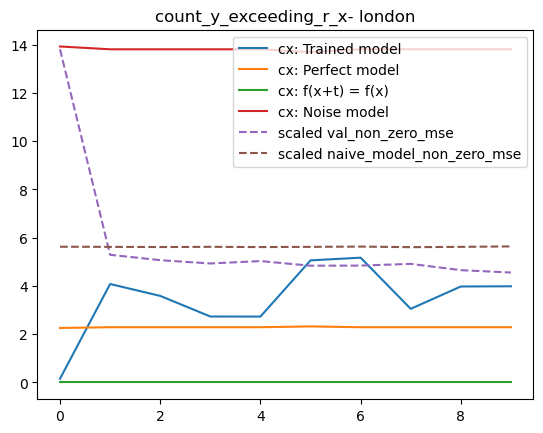

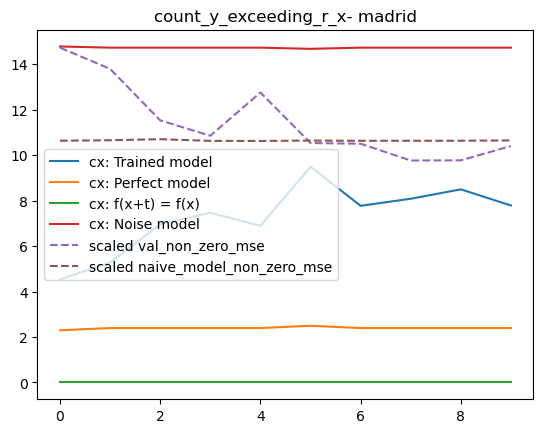

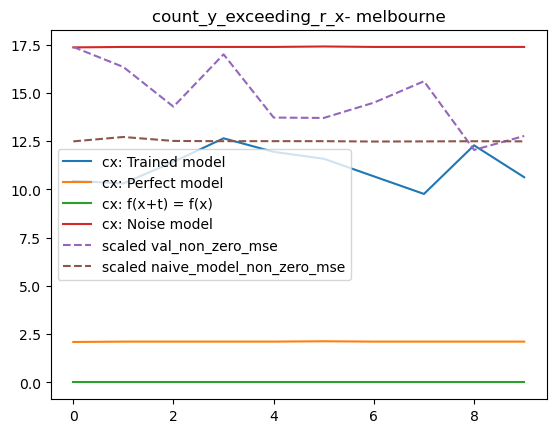

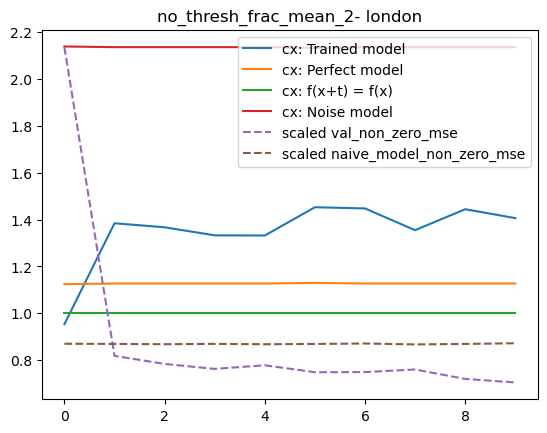

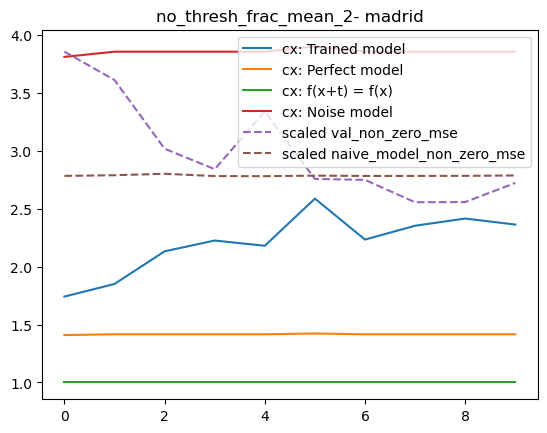

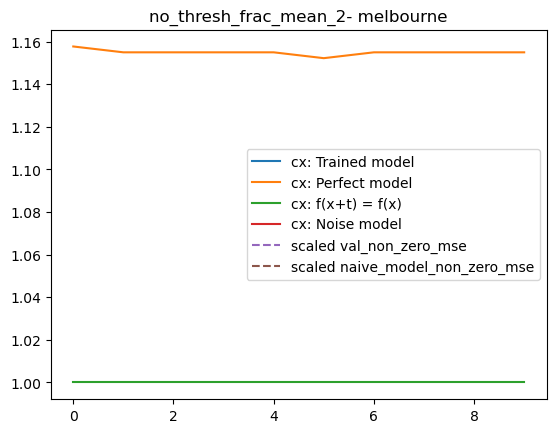

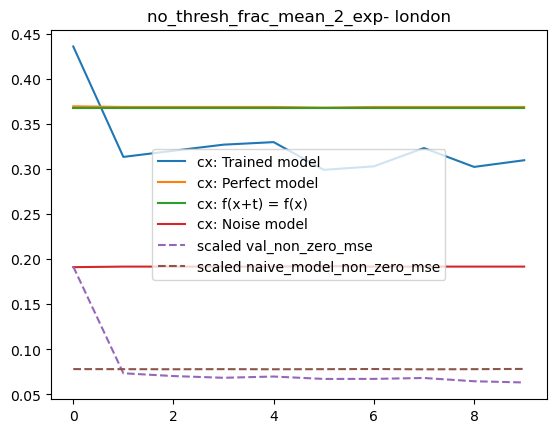

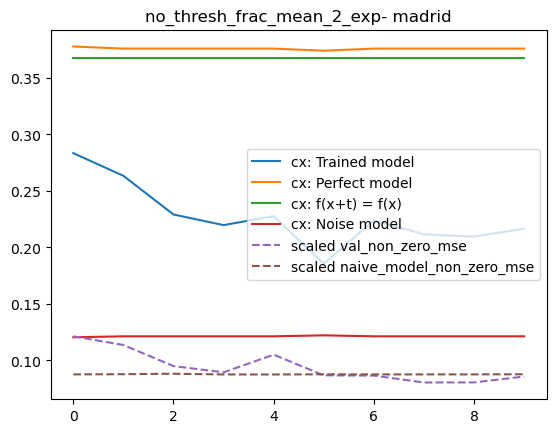

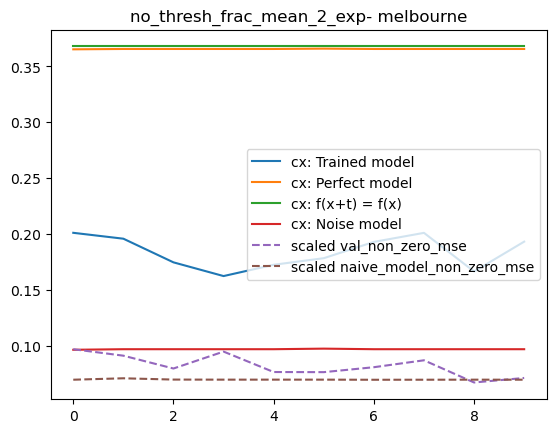

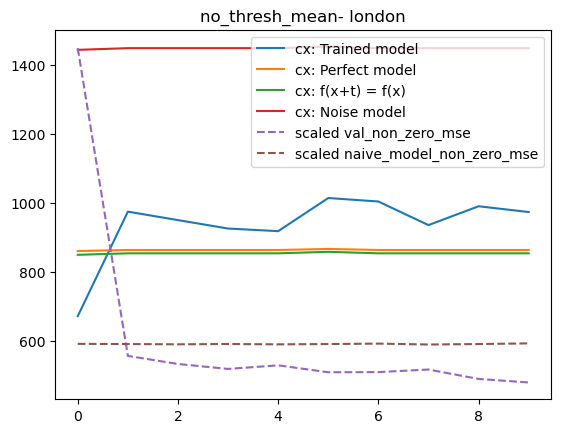

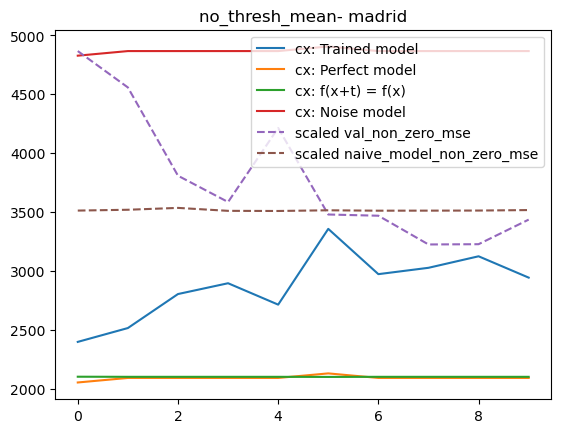

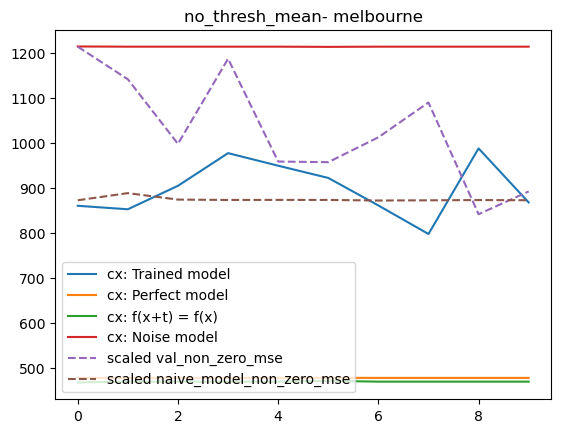

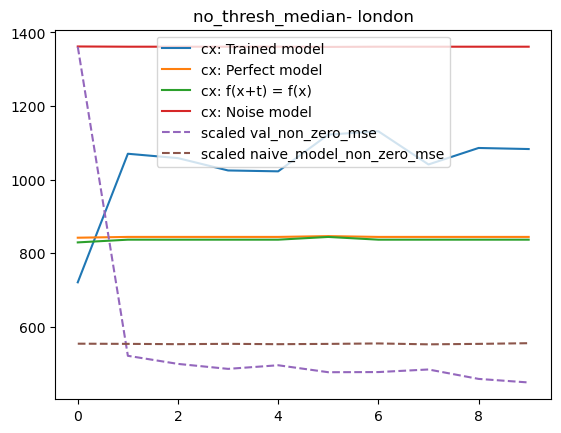

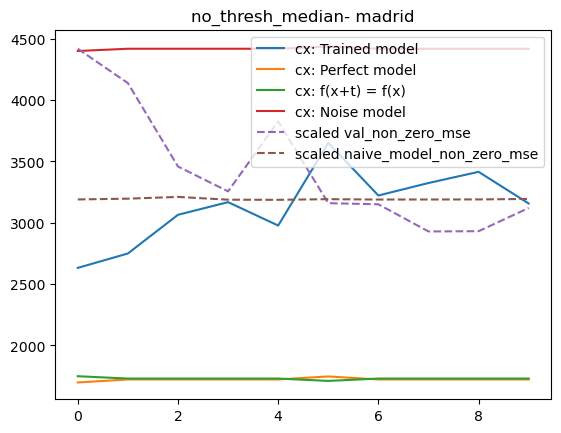

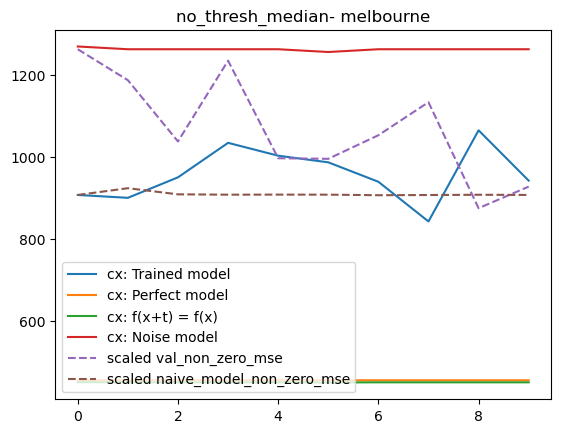

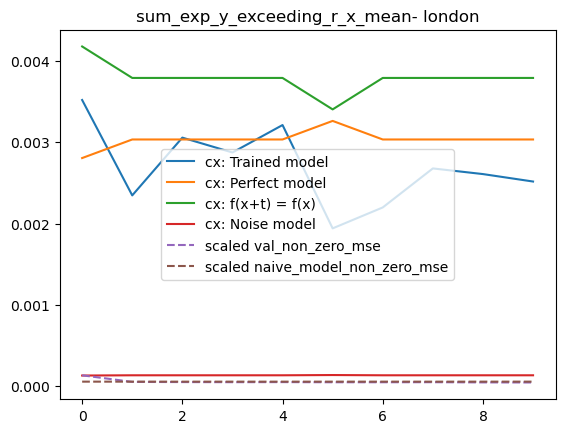

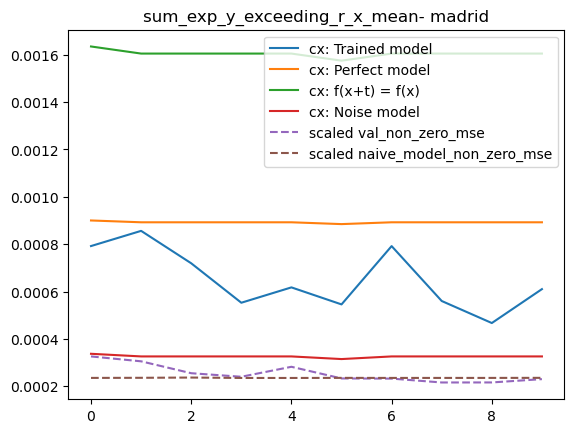

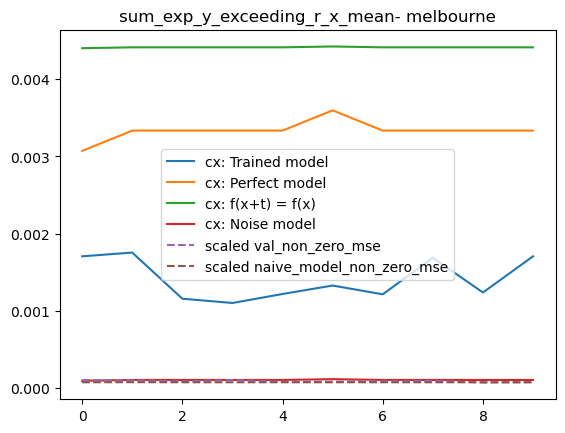

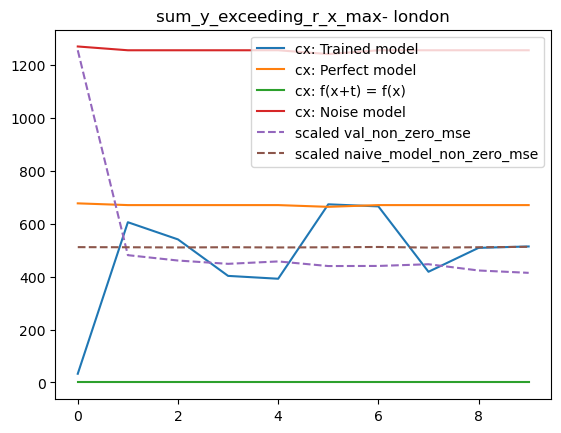

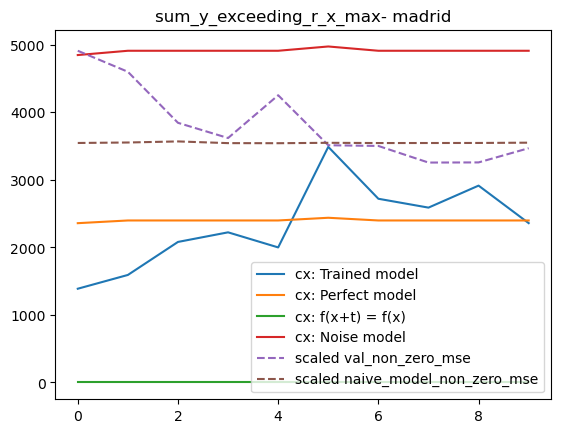

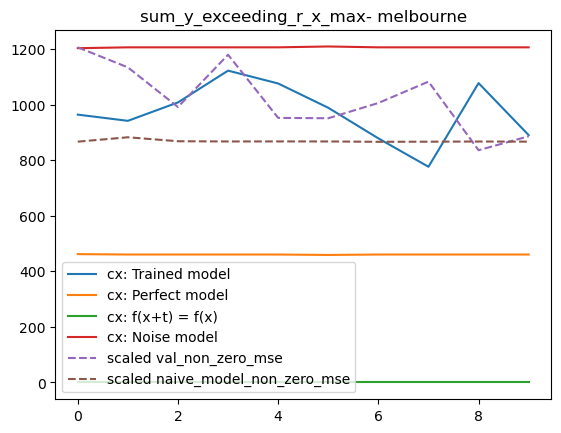

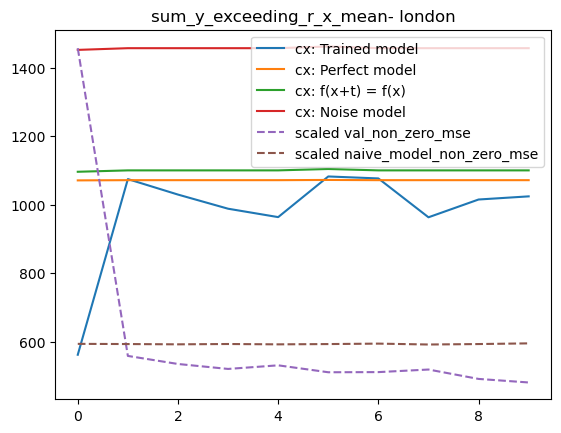

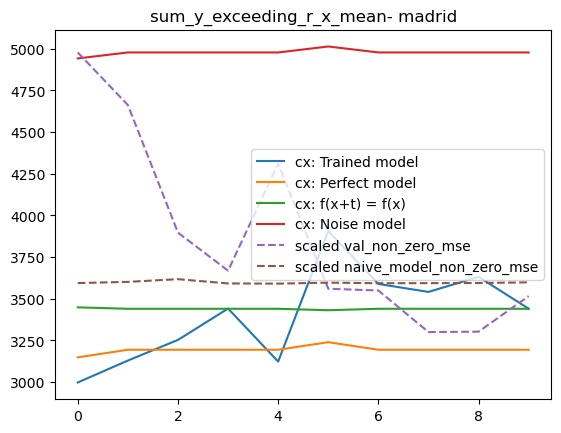

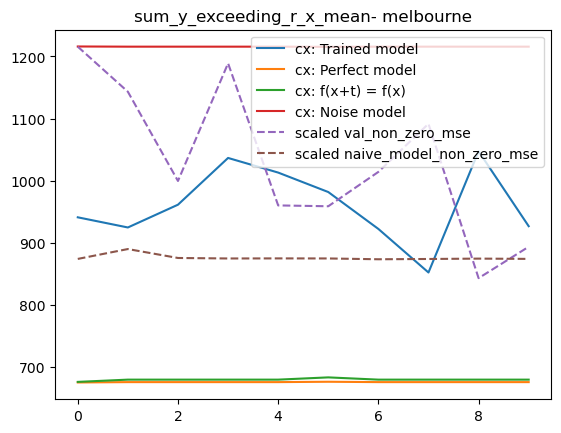

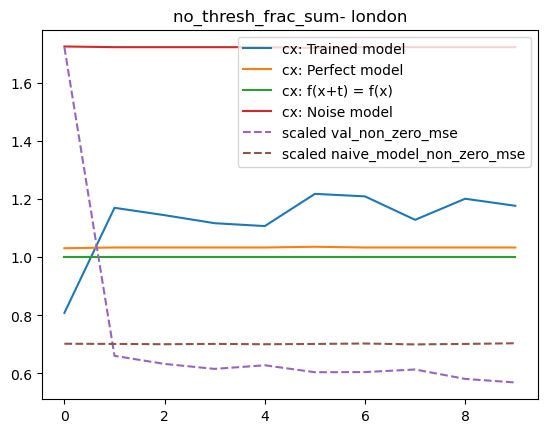

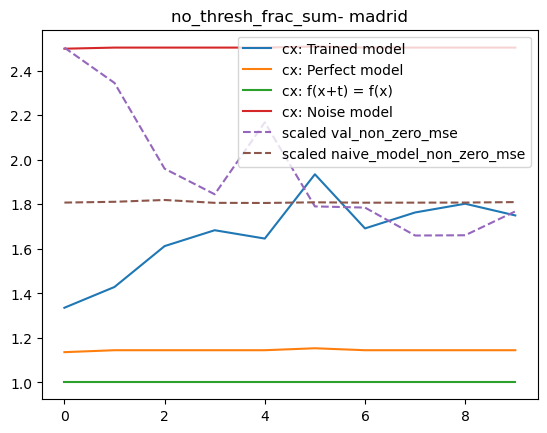

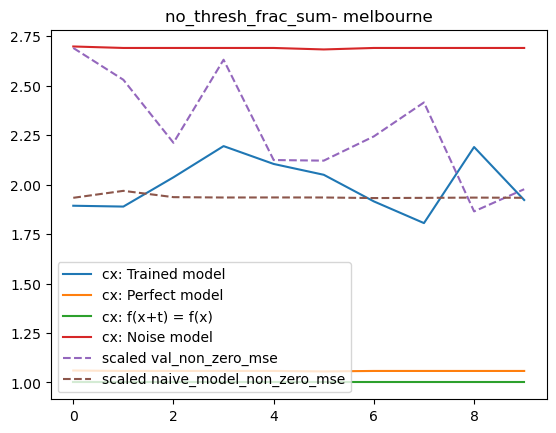

In [135]:
import matplotlib.pyplot as plt




for csr_type in ['CSR_GB_count_y_exceeding_r_x', 'CSR_GB_no_thresh_frac_mean_2',
       'CSR_GB_no_thresh_frac_mean_2_exp', 'CSR_GB_no_thresh_mean',
       'CSR_GB_no_thresh_median', 'CSR_GB_sum_exp_y_exceeding_r_x_mean',
       'CSR_GB_sum_y_exceeding_r_x_max', 'CSR_GB_sum_y_exceeding_r_x_mean','CSR_GB_no_thresh_frac_sum']:
    for city in config.city_list:
        
        df = pd.read_csv("csr_epochs_3_cities_predhoriz_4/val_csv_" + city.lower() + "-1-4-55-.csv")
        df = df.fillna(df.mean())
        df.head()


        x = df["epoch"].tolist()
        val_mse = df["val_loss"].tolist()
        val_non_zero_mse = df["val_non_zero_mse"].tolist()
        nm_non_zero = df["naive-model-non-zero"].tolist()
        nm_mse = df["naive-model-mse"].tolist()
    
        cx_MP = df[csr_type.replace("_GB_", "_MP_")].tolist()
        cx_PM = df[csr_type.replace("_GB_", "_PM_")].tolist()
        cx_NM = df[csr_type.replace("_GB_", "_NM_")].tolist()
        cx_GB = df[csr_type.replace("_GB_", "_GB_")].tolist()


        import matplotlib.pyplot as plt
        plt.plot(x, cx_MP, label = "cx: Trained model")
        plt.plot(x, cx_PM, label = "cx: Perfect model")
        plt.plot(x, cx_NM, label = "cx: f(x+t) = f(x)")
        plt.plot(x, cx_GB, label = "cx: Noise model")
        # plt.plot(x, val_non_zero_mse, '--', label = "val_non_zero_mse")
        # plt.plot(x, nm_non_zero, '--',label = "naive_model_non_zero_mse")

        plt.plot(x, np.array(val_non_zero_mse)/np.max(val_non_zero_mse) * np.mean(cx_GB), '--', label = "scaled val_non_zero_mse")
        plt.plot(x, np.array(nm_non_zero) / np.max(val_non_zero_mse) * np.mean(cx_GB), '--',label = "scaled naive_model_non_zero_mse")

        # plt.plot(x, val_mse, label = "val_mse")
        plt.legend()
        # plt.ylim(0, 2000)
        # plt.yscale('log')
        plt.title(csr_type.split("_GB_")[1] + "- " + city)
        plt.show()



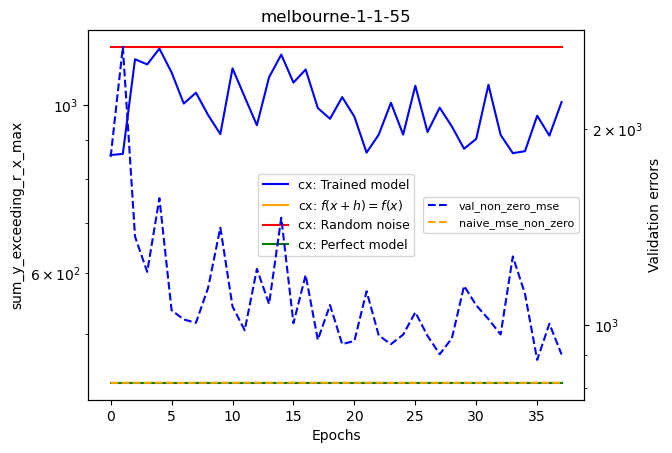

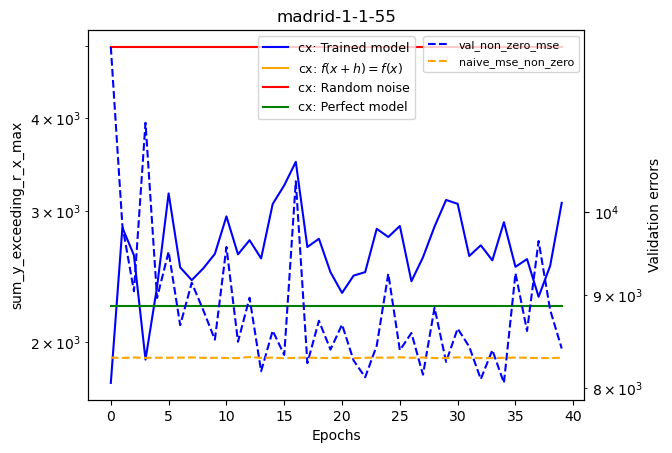

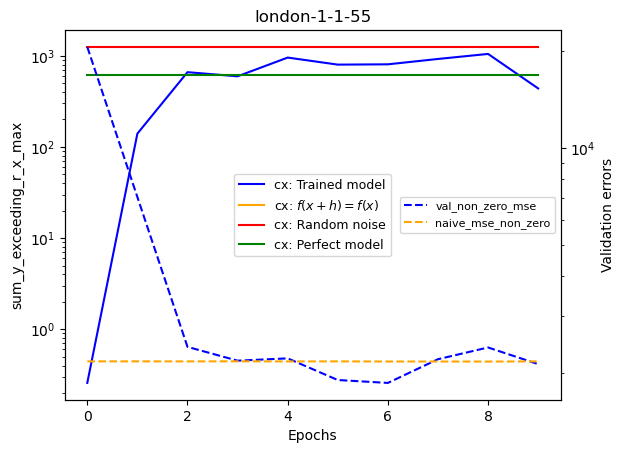

In [130]:
######################################################################################
df = pd.read_csv("csr_epochs_3_cities/val_csv_melbourne-1-1-55-.csv")
df = df.fillna(df.mean())
df.head()

x = df["epoch"].tolist()
val_mse = df["val_loss"].tolist()
val_non_zero_mse = df["val_non_zero_mse"].tolist()
nm_non_zero = df["naive-model-non-zero"].tolist()

cx_MP = df["CSR_MP_sum_y_exceeding_r_x_max"].tolist()
cx_PM = df["CSR_PM_sum_y_exceeding_r_x_max"].tolist()
cx_NM = df["CSR_NM_sum_y_exceeding_r_x_max"].tolist()
cx_GB = df["CSR_GB_sum_y_exceeding_r_x_max"].tolist()

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()


ax1.set_xlabel('Epochs')
ax1.set_ylabel('sum_y_exceeding_r_x_max')
ax2.set_ylabel('Validation errors')


ax1.plot(x, cx_MP, label="cx: Trained model", color='blue')
ax1.plot(x, cx_NM, label=r"cx: $f(x+h) = f(x)$", color="orange")
ax1.plot(x, cx_GB, label="cx: Random noise", color="red")
ax1.plot(x, cx_PM, label="cx: Perfect model", color="green")


ax2.plot(x, val_non_zero_mse, '--', label = "val_non_zero_mse", color='blue')
# ax2.plot(x, val_mse, '--', label = "val_mse", color='blue')
ax2.plot(x, nm_non_zero, '--', label = "naive_mse_non_zero", color="orange")

# plt.legend()
# plt.ylim(0, 2000)
# plt.yscale('log')
ax1.set_yscale("log")
ax2.set_yscale("log")

ax2.legend(loc="center right", fontsize=8) # loc=1)
ax1.legend(loc="center", fontsize=9)
plt.title("melbourne-1-1-55")
# ax1.set_ylim(0.5, 10000)
# ax2.set_ylim(1000, 10000)
plt.savefig("merlbourne-1-1-55-epochs.png", dpi=600)
plt.show()



######################################################################################
df = pd.read_csv("csr_epochs_3_cities/val_csv_madrid-1-1-55-.csv")
df = df.fillna(df.mean())
df.head()

x = df["epoch"].tolist()
val_mse = df["val_loss"].tolist()
val_non_zero_mse = df["val_non_zero_mse"].tolist()
nm_non_zero = df["naive-model-non-zero"].tolist()

cx_MP = df["CSR_MP_sum_y_exceeding_r_x_max"].tolist()
cx_PM = df["CSR_PM_sum_y_exceeding_r_x_max"].tolist()
cx_NM = df["CSR_NM_sum_y_exceeding_r_x_max"].tolist()
cx_GB = df["CSR_GB_sum_y_exceeding_r_x_max"].tolist()

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()


ax1.set_xlabel('Epochs')
ax1.set_ylabel('sum_y_exceeding_r_x_max')
ax2.set_ylabel('Validation errors')


ax1.plot(x, cx_MP, label="cx: Trained model", color='blue')
ax1.plot(x, cx_NM, label=r"cx: $f(x+h) = f(x)$", color="orange")
ax1.plot(x, cx_GB, label="cx: Random noise", color="red")
ax1.plot(x, cx_PM, label="cx: Perfect model", color="green")


ax2.plot(x, val_non_zero_mse, '--', label = "val_non_zero_mse", color='blue')
# ax2.plot(x, val_mse, '--', label = "val_mse", color='blue')
ax2.plot(x, nm_non_zero, '--', label = "naive_mse_non_zero", color="orange")

# plt.legend()
# plt.ylim(0, 2000)
# plt.yscale('log')
ax1.set_yscale("log")
ax2.set_yscale("log")

ax2.legend(loc=1, fontsize=8) # loc=1)
ax1.legend(loc=9, fontsize=9)
plt.title("madrid-1-1-55")
# ax1.set_ylim(0.5, 10000)
# ax2.set_ylim(1000, 10000)
plt.savefig("madrid-1-1-55-epochs.png", dpi=600)
plt.show()

######################################################################################

df = pd.read_csv("csr_epochs_3_cities/val_csv_london-1-1-55-.csv")
df = df.fillna(df.mean())
df.head()

x = df["epoch"].tolist()
val_mse = df["val_loss"].tolist()
val_non_zero_mse = df["val_non_zero_mse"].tolist()
nm_non_zero = df["naive-model-non-zero"].tolist()

cx_MP = df["CSR_MP_sum_y_exceeding_r_x_max"].tolist()
cx_PM = df["CSR_PM_sum_y_exceeding_r_x_max"].tolist()
cx_NM = df["CSR_NM_sum_y_exceeding_r_x_max"].tolist()
cx_GB = df["CSR_GB_sum_y_exceeding_r_x_max"].tolist()

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()


ax1.set_xlabel('Epochs')
ax1.set_ylabel('sum_y_exceeding_r_x_max')
ax2.set_ylabel('Validation errors')


ax1.plot(x, cx_MP, label="cx: Trained model", color='blue')
ax1.plot(x, cx_NM, label=r"cx: $f(x+h) = f(x)$", color="orange")
ax1.plot(x, cx_GB, label="cx: Random noise", color="red")
ax1.plot(x, cx_PM, label="cx: Perfect model", color="green")


ax2.plot(x, val_non_zero_mse, '--', label = "val_non_zero_mse", color='blue')
# ax2.plot(x, val_mse, '--', label = "val_mse", color='blue')
ax2.plot(x, nm_non_zero, '--', label = "naive_mse_non_zero", color="orange")

# plt.legend()
# plt.ylim(0, 2000)
# plt.yscale('log')
ax1.set_yscale("log")
ax2.set_yscale("log")

ax2.legend(loc="center right", fontsize=8) # loc=1)
ax1.legend(loc="center", fontsize=9)
plt.title("london-1-1-55")
plt.savefig("london-1-1-55-epochs.png", dpi=600)
# ax1.set_ylim(0.5, 10000)
# ax2.set_ylim(1000, 10000)
plt.show()

In [73]:
df.columns

Index(['epoch', 'CSR_GB_count_y_exceeding_r_x', 'CSR_GB_no_thresh_frac_mean_2',
       'CSR_GB_no_thresh_frac_mean_2_exp', 'CSR_GB_no_thresh_frac_sum',
       'CSR_GB_no_thresh_mean', 'CSR_GB_no_thresh_median',
       'CSR_GB_sum_exp_y_exceeding_r_x_mean', 'CSR_GB_sum_y_exceeding_r_x_max',
       'CSR_GB_sum_y_exceeding_r_x_mean', 'CSR_MP_count_y_exceeding_r_x',
       'CSR_MP_no_thresh_frac_mean_2', 'CSR_MP_no_thresh_frac_mean_2_exp',
       'CSR_MP_no_thresh_frac_sum', 'CSR_MP_no_thresh_mean',
       'CSR_MP_no_thresh_median', 'CSR_MP_sum_exp_y_exceeding_r_x_mean',
       'CSR_MP_sum_y_exceeding_r_x_max', 'CSR_MP_sum_y_exceeding_r_x_mean',
       'CSR_NM_count_y_exceeding_r_x', 'CSR_NM_no_thresh_frac_mean_2',
       'CSR_NM_no_thresh_frac_mean_2_exp', 'CSR_NM_no_thresh_frac_sum',
       'CSR_NM_no_thresh_mean', 'CSR_NM_no_thresh_median',
       'CSR_NM_sum_exp_y_exceeding_r_x_mean', 'CSR_NM_sum_y_exceeding_r_x_max',
       'CSR_NM_sum_y_exceeding_r_x_mean', 'CSR_PM_count_y_exceeding_

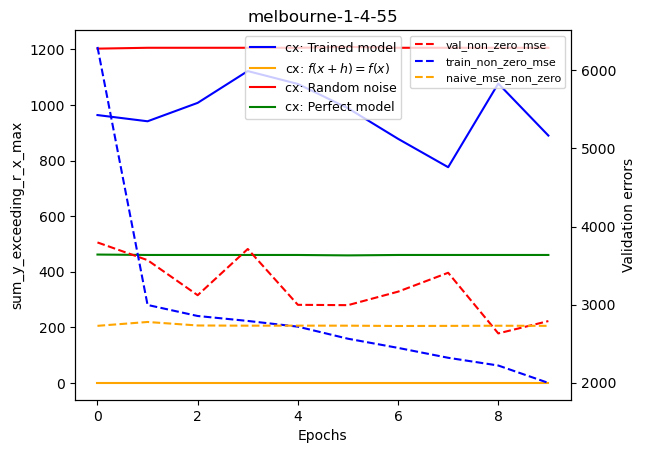

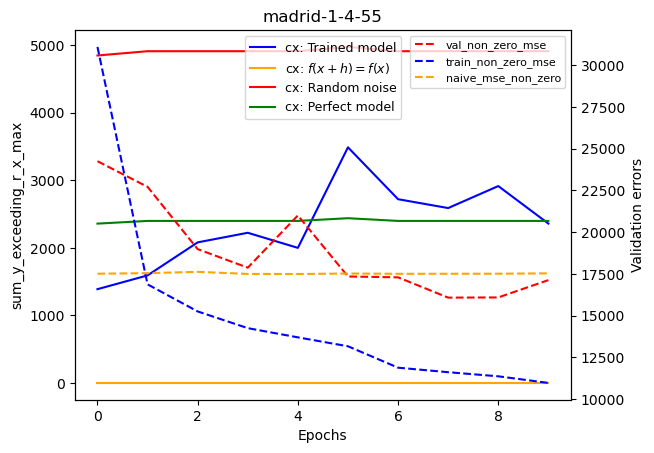

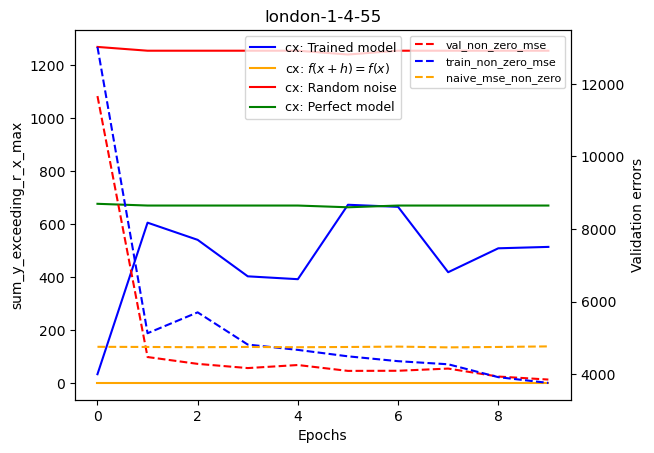

In [122]:
######################################################################################
df = pd.read_csv("csr_epochs_3_cities_predhoriz_4/val_csv_melbourne-1-4-55-.csv")
df = df.fillna(df.mean())
df.head()

x = df["epoch"].tolist()
val_mse = df["val_loss"].tolist()
val_non_zero_mse = df["val_non_zero_mse"].tolist()
train_non_zero_mse = df["non_zero_mse"].tolist()
nm_non_zero = df["naive-model-non-zero"].tolist()

cx_MP = df["CSR_MP_sum_y_exceeding_r_x_max"].tolist()
cx_PM = df["CSR_PM_sum_y_exceeding_r_x_max"].tolist()
cx_NM = df["CSR_NM_sum_y_exceeding_r_x_max"].tolist()
cx_GB = df["CSR_GB_sum_y_exceeding_r_x_max"].tolist()

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()


ax1.set_xlabel('Epochs')
ax1.set_ylabel('sum_y_exceeding_r_x_max')
ax2.set_ylabel('Validation errors')


ax1.plot(x, cx_MP, label="cx: Trained model", color='blue')
ax1.plot(x, cx_NM, label=r"cx: $f(x+h) = f(x)$", color="orange")
ax1.plot(x, cx_GB, label="cx: Random noise", color="red")
ax1.plot(x, cx_PM, label="cx: Perfect model", color="green")


ax2.plot(x, val_non_zero_mse, '--', label = "val_non_zero_mse", color='red')
ax2.plot(x, train_non_zero_mse, '--', label = "train_non_zero_mse", color='blue')
# ax2.plot(x, val_mse, '--', label = "val_mse", color='blue')
ax2.plot(x, nm_non_zero, '--', label = "naive_mse_non_zero", color="orange")

# plt.legend()
# plt.ylim(0, 2000)
# plt.yscale('log')
# ax1.set_yscale("log")
# ax2.set_yscale("log")

ax2.legend(loc=1, fontsize=8) # loc=1)
ax1.legend(loc=9, fontsize=9)
plt.title("melbourne-1-4-55")
plt.savefig("melbourne-1-4-55-epochs.png", dpi=600)
# ax1.set_ylim(0.5, 10000)
# ax2.set_ylim(1000, 10000)
plt.show()



######################################################################################
df = pd.read_csv("csr_epochs_3_cities_predhoriz_4/val_csv_madrid-1-4-55-.csv")
df = df.fillna(df.mean())
df.head()

x = df["epoch"].tolist()
val_mse = df["val_loss"].tolist()
val_non_zero_mse = df["val_non_zero_mse"].tolist()
train_non_zero_mse = df["non_zero_mse"].tolist()
nm_non_zero = df["naive-model-non-zero"].tolist()

cx_MP = df["CSR_MP_sum_y_exceeding_r_x_max"].tolist()
cx_PM = df["CSR_PM_sum_y_exceeding_r_x_max"].tolist()
cx_NM = df["CSR_NM_sum_y_exceeding_r_x_max"].tolist()
cx_GB = df["CSR_GB_sum_y_exceeding_r_x_max"].tolist()

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()


ax1.set_xlabel('Epochs')
ax1.set_ylabel('sum_y_exceeding_r_x_max')
ax2.set_ylabel('Validation errors')


ax1.plot(x, cx_MP, label="cx: Trained model", color='blue')
ax1.plot(x, cx_NM, label=r"cx: $f(x+h) = f(x)$", color="orange")
ax1.plot(x, cx_GB, label="cx: Random noise", color="red")
ax1.plot(x, cx_PM, label="cx: Perfect model", color="green")


ax2.plot(x, val_non_zero_mse, '--', label = "val_non_zero_mse", color='red')
ax2.plot(x, train_non_zero_mse, '--', label = "train_non_zero_mse", color='blue')
# ax2.plot(x, val_mse, '--', label = "val_mse", color='blue')
ax2.plot(x, nm_non_zero, '--', label = "naive_mse_non_zero", color="orange")

# plt.legend()
# plt.ylim(0, 2000)
# plt.yscale('log')
# ax1.set_yscale("log")
# ax2.set_yscale("log")

ax2.legend(loc=1, fontsize=8) # loc=1)
ax1.legend(loc=9, fontsize=9)
plt.title("madrid-1-4-55")
plt.savefig("madrid-1-4-55-epochs.png", dpi=600)
# ax1.set_ylim(0.5, 10000)
# ax2.set_ylim(1000, 10000)
plt.show()

######################################################################################

df = pd.read_csv("csr_epochs_3_cities_predhoriz_4/val_csv_london-1-4-55-.csv")
df = df.fillna(df.mean())
df.head()

x = df["epoch"].tolist()
val_mse = df["val_loss"].tolist()
val_non_zero_mse = df["val_non_zero_mse"].tolist()
train_non_zero_mse = df["non_zero_mse"].tolist()
nm_non_zero = df["naive-model-non-zero"].tolist()

cx_MP = df["CSR_MP_sum_y_exceeding_r_x_max"].tolist()
cx_PM = df["CSR_PM_sum_y_exceeding_r_x_max"].tolist()
cx_NM = df["CSR_NM_sum_y_exceeding_r_x_max"].tolist()
cx_GB = df["CSR_GB_sum_y_exceeding_r_x_max"].tolist()


import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()


ax1.set_xlabel('Epochs')
ax1.set_ylabel('sum_y_exceeding_r_x_max')
ax2.set_ylabel('Validation errors')


ax1.plot(x, cx_MP, label="cx: Trained model", color='blue')
ax1.plot(x, cx_NM, label=r"cx: $f(x+h) = f(x)$", color="orange")
ax1.plot(x, cx_GB, label="cx: Random noise", color="red")
ax1.plot(x, cx_PM, label="cx: Perfect model", color="green")


ax2.plot(x, val_non_zero_mse, '--', label = "val_non_zero_mse", color='red')
ax2.plot(x, train_non_zero_mse, '--', label = "train_non_zero_mse", color='blue')
# ax2.plot(x, val_mse, '--', label = "val_mse", color='blue')
ax2.plot(x, nm_non_zero, '--', label = "naive_mse_non_zero", color="orange")

# plt.legend()
# plt.ylim(0, 2000)
# plt.yscale('log')
# ax1.set_yscale("log")
# ax2.set_yscale("log")

ax2.legend(loc=1, fontsize=8) # loc=1)
ax1.legend(loc=9, fontsize=9)
plt.title("london-1-4-55")
# ax1.set_ylim(0.5, 10000)
# ax2.set_ylim(1000, 10000)
plt.savefig("london-1-4-55-epochs.png", dpi=600)
plt.show()